# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Ethereum merupakan salah satu crypto currency. Tujuan analisa pergerakan volume Ethereum ini adalah ingin menunjukkan banyaknya jumlah perdagangan yang dilakukan oleh traders.

Kita akan scrap data dari website trading research yaitu data volume yang sudah dirangkum dalam satuan USD per harinya.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [3]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data#panel',  headers = { 'User-Agent': 'Popular browser\'s user-agent', })
print(type(soup))

<class 'bs4.BeautifulSoup'>


To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [4]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

In [5]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js">
  </script>
  <script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="applica


As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [6]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
soup

<!DOCTYPE html>

<html lang="en">
<head>
<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="/favicon.ico" rel="shortcut icon"/>
<link href="/OpensearchDescription.xml" rel="search" type="application/opensearchdescription+xml">
<title>Ethereum USD Historical Data | CoinGecko</title>
<meta content="Get Ethereum (ETH) USD historical prices." name="description">
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
  new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
  j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
  'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
  })(window,document,'script','dataLayer','GTM-NP34MX7

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` .

If you look at the website, you can find the types of data provided, for example tables and graphs like the two images below
<img src="asset/image2.jpg">

<img src="asset/image1.jpg">

If our purpose is to scrap volume data, then what is feasible is we use the table data rather than graph. But from the graph if we direct our cursor, then we can see the movement of the volume over a period of time (time information can be adjust on the website).

In [7]:
table = soup.find('tbody')

In [8]:
print(table.prettify()[1:500])

tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-03
  </th>
  <td class="text-center">
   $154,934,842,226
  </td>
  <td class="text-center">
   $6,227,268,236
  </td>
  <td class="text-center">
   $1,277.90
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2022-10-02
  </th>
  <td class="text-center">
   $158,410,068,981
  </td>
  <td class="text-center">
   $5,052,407,841
  </td>
  <td class="text


Finding row length.

In [9]:
table.find_all('th', attrs={'scope':'row','class':'font-semibold text-center'})[:5]

[<th class="font-semibold text-center" scope="row">2022-10-03</th>,
 <th class="font-semibold text-center" scope="row">2022-10-02</th>,
 <th class="font-semibold text-center" scope="row">2022-10-01</th>,
 <th class="font-semibold text-center" scope="row">2022-09-30</th>,
 <th class="font-semibold text-center" scope="row">2022-09-29</th>]

In [10]:
table.find_all('th', attrs={'scope':'row','class':'font-semibold text-center'})[0].text

'2022-10-03'

In [11]:
table.find_all('td', attrs={'class':'text-center'})[:5]

[<td class="text-center">
 $154,934,842,226
 </td>,
 <td class="text-center">
 $6,227,268,236
 </td>,
 <td class="text-center">
 $1,277.90
 </td>,
 <td class="text-center">
 N/A
 </td>,
 <td class="text-center">
 $158,410,068,981
 </td>]

In [12]:
table.find_all('td', attrs={'class':'text-center'})[0].text

'\n$154,934,842,226\n'

### Extracting the Information

In [13]:
row = table.find_all('th', attrs={'scope':'row','class':'font-semibold text-center'})
row_length = len(row)
row_length

31

In [14]:
row_2 = table.find_all('td', attrs={'class':'text-center'})
row_length_2 = len(row_2)
row_length_2

124

Okay, okay now we know the length of our data, now here what we will do for the looping process. 

Here what the looping do to scrap the information: 

- First we need to establish a placeholder to receive the information that we scrap. 
- We named our placeholder `temp` and `temp2` and they're a list. 
- Then we will make a loop from one until the the length of the table row, 
- which we will find all cell of the column one and two which contain period(date) and volume. 
- Then we will append it to each of our tuple that we prepared before, 
- every one iteration we will scrap one line of the table.  

In [15]:
temp = [] #initiating a tuple

for i in range(0, row_length):
    period = table.find_all('th', attrs={'scope':'row','class':'font-semibold text-center'})[i].text
 
    temp.append(period)
    
temp

['2022-10-03',
 '2022-10-02',
 '2022-10-01',
 '2022-09-30',
 '2022-09-29',
 '2022-09-28',
 '2022-09-27',
 '2022-09-26',
 '2022-09-25',
 '2022-09-24',
 '2022-09-23',
 '2022-09-22',
 '2022-09-21',
 '2022-09-20',
 '2022-09-19',
 '2022-09-18',
 '2022-09-17',
 '2022-09-16',
 '2022-09-15',
 '2022-09-14',
 '2022-09-13',
 '2022-09-12',
 '2022-09-11',
 '2022-09-10',
 '2022-09-09',
 '2022-09-08',
 '2022-09-07',
 '2022-09-06',
 '2022-09-05',
 '2022-09-04',
 '2022-09-03']

The range() function returns a sequence of numbers, starting from 0 by default, and increments by 1 (by default), and stops before a specified number. On looping below in placeholder temp2, i use `range(start, stop, step)` or as the parameter being explained below: 
<img src="asset/image3.jpg">

Furthermore you take a look into it on [this website](https://www.w3schools.com/python/ref_func_range.asp#gsc.tab=0), which i used it as one of my references for this notebook.

In [16]:
temp2 = [] #initiating a tuple
    
for i in range(1, row_length_2, 4): 


    volume = table.find_all('td', attrs={'class' : 'text-center'})[i].text
    
    volume = volume.strip()
    
    temp2.append(volume)
    
temp2

['$6,227,268,236',
 '$5,052,407,841',
 '$11,849,125,784',
 '$11,834,328,252',
 '$16,571,161,476',
 '$16,685,874,856',
 '$15,270,197,376',
 '$10,552,647,870',
 '$11,251,326,609',
 '$17,599,766,731',
 '$17,517,188,721',
 '$18,732,743,242',
 '$13,605,986,462',
 '$17,757,533,838',
 '$14,696,599,277',
 '$10,309,763,882',
 '$17,892,819,035',
 '$24,787,864,367',
 '$17,198,033,718',
 '$22,286,700,927',
 '$16,770,566,236',
 '$11,692,754,175',
 '$12,521,808,521',
 '$19,418,675,071',
 '$16,676,188,643',
 '$18,560,005,397',
 '$20,860,201,644',
 '$11,815,125,729',
 '$7,827,505,125',
 '$8,500,114,334',
 '$15,857,654,357']

## Creating data frame & Data wrangling

After scrapping the data i want to use for analyzing, now we can create dataframe and use it for data wrangling. I created dataframe from dictionary. I typed in our dict with like this: `dict = {key1:value1, key2:value2, ... }`, key1 = Date and Key2 Volume from that the keys will become the columns name in the dataframe we're making.


In [17]:
import pandas as pd

df = pd.DataFrame({
    'Date' : temp,
    'Volume' : temp2
}, columns=['Date','Volume'])
df

,Date,Volume
0,2022-10-03,"$6,227,268,236"
1,2022-10-02,"$5,052,407,841"
2,2022-10-01,"$11,849,125,784"
3,2022-09-30,"$11,834,328,252"
4,2022-09-29,"$16,571,161,476"
5,2022-09-28,"$16,685,874,856"
6,2022-09-27,"$15,270,197,376"
7,2022-09-26,"$10,552,647,870"
8,2022-09-25,"$11,251,326,609"
9,2022-09-24,"$17,599,766,731"


In [18]:
df.columns

Index(['Date', 'Volume'], dtype='object')

Let's check our dataframe data types to see if our data is useable. 

In [21]:
df.dtypes

Date      object
Volume    object
dtype: object

In [22]:
df_bydate = df.sort_values(by='Date', ascending=True)

In [23]:
df_bydate_index = df_bydate.set_index('Date')
df_bydate_index

,Volume
Date,
2022-09-03,"$15,857,654,357"
2022-09-04,"$8,500,114,334"
2022-09-05,"$7,827,505,125"
2022-09-06,"$11,815,125,729"
2022-09-07,"$20,860,201,644"
2022-09-08,"$18,560,005,397"
2022-09-09,"$16,676,188,643"
2022-09-10,"$19,418,675,071"
2022-09-11,"$12,521,808,521"


Do the data cleaning here. The current data types are `object` if we want to plot that we need atleast 1(one) numeric data. I tried to change the Date into `Datetime64` but because the Volume i changed to `int64` is too big than i decided to only change the Volume data type and maintain the Date original data type which was `object`.'


In [24]:
df_bydate_index['Volume'] = df_bydate_index['Volume'].str.replace("$", "")
df_bydate_index['Volume'] = df_bydate_index['Volume'].str.replace(",","")

C:\Users\anast\AppData\Local\Temp\ipykernel_5228\4036184768.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_bydate_index['Volume'] = df_bydate_index['Volume'].str.replace("$", "")


In [25]:
df_bydate_index['Volume'] = df_bydate_index['Volume'].astype('int64')

## Data Visualization

Dengan cukup mudah, kita bisa membuat objek plot `matplotlib` dengan hanya menggunakan method `.plot()`.

In [26]:
import matplotlib.pyplot as plt

In [27]:
print(plt.style.available)
plt.style.use('seaborn-talk')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [28]:
df_bydate_index.dtypes

Volume    int64
dtype: object

<AxesSubplot:xlabel='Date'>

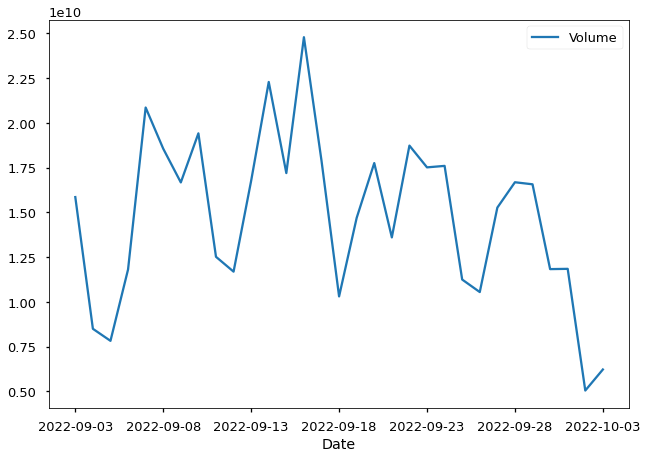

In [29]:
df_bydate_index.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. Syntax below, I got it from following a youtuber guidance about customizing your plot in python. One of default styles from `matplotlib` is `rcParams`, with this style we can dynamically change the x and y label, the title, the legend, etc. Note: `rc` in `rcParams` stands for running command.

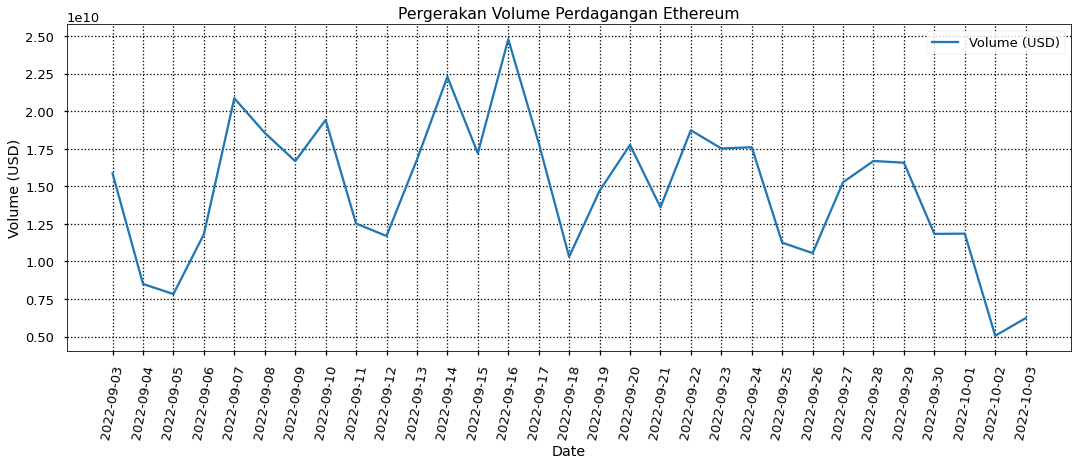

In [30]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 18,6
plt.plot(df_bydate_index.Volume, label='Volume (USD)')
plt.grid(True, color='k', linestyle=':')
plt.title("Pergerakan Volume Perdagangan Ethereum")
plt.xticks(rotation = 80)
plt.xlabel('Date')
plt.ylabel('Volume (USD)')
plt.legend();

💡Insight:
Pergerakan Volume perdagangan mata uang Ethereum cukup fluktuatif, paling tinggi selama kurun waktu 1(satu) bulan terakhir yaitu terdapat pada pertengahan bulan Sebtember tepatnya 16 September 2022 (2022-09-16) yaitu sebesar USD 24,787,864,367.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.